In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [108]:
train_data = pd.read_csv('/kaggle/input/summeranalytics2020/train.csv')
train_data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [109]:
test_data = pd.read_csv('/kaggle/input/summeranalytics2020/test.csv')
test_data.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [110]:
from sklearn.preprocessing import LabelEncoder
train_data.select_dtypes(include=['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Non-Travel,Research & Development,Medical,Female,Laboratory Technician,Single,No
1,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married,Yes
2,Travel_Rarely,Sales,Medical,Male,Sales Executive,Single,No
3,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Single,No
4,Travel_Rarely,Research & Development,Other,Male,Manufacturing Director,Married,No
...,...,...,...,...,...,...,...
1623,Travel_Frequently,Research & Development,Medical,Male,Research Scientist,Divorced,Yes
1624,Travel_Rarely,Sales,Medical,Male,Sales Executive,Single,No
1625,Travel_Rarely,Sales,Life Sciences,Male,Sales Representative,Married,No
1626,Travel_Rarely,Human Resources,Human Resources,Male,Human Resources,Divorced,Yes


train_data = LabelEncoder.fit_transform(train_data.BusinessTravel)
train_data

In [111]:
train_data['BusinessTravel_n'] = LabelEncoder().fit_transform(train_data.BusinessTravel)
train_data['Department_n'] = LabelEncoder().fit_transform(train_data.Department)
train_data['EducationField_n'] = LabelEncoder().fit_transform(train_data.EducationField)
train_data['Gender_n'] = LabelEncoder().fit_transform(train_data.Gender)
train_data['JobRole_n'] = LabelEncoder().fit_transform(train_data.JobRole)
train_data['MaritalStatus_n'] = LabelEncoder().fit_transform(train_data.MaritalStatus)
train_data['OverTime_n'] = LabelEncoder().fit_transform(train_data.OverTime)
train_data.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis=1, inplace=True)
train_data.head()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,YearsWithCurrManager,CommunicationSkill,Behaviour,BusinessTravel_n,Department_n,EducationField_n,Gender_n,JobRole_n,MaritalStatus_n,OverTime_n
0,1,30,0,2,3,571,3,3,4,2564,...,7,4,1,0,1,3,0,2,2,0
1,2,36,0,12,4,1614,3,3,3,4663,...,1,2,1,2,1,1,0,4,1,1
2,3,55,1,2,1,842,3,3,4,5160,...,3,5,1,2,2,3,1,7,2,0
3,4,39,0,24,1,2014,1,3,4,4108,...,7,4,1,2,1,1,1,6,2,0
4,5,37,0,3,3,689,3,3,3,9434,...,8,1,1,2,1,4,1,4,1,0


In [112]:
X = train_data.drop('Attrition', axis=1)
X
y = train_data.Attrition
y

0       0
1       0
2       1
3       0
4       0
       ..
1623    1
1624    1
1625    1
1626    1
1627    1
Name: Attrition, Length: 1628, dtype: int64

In [113]:
test_data['BusinessTravel_n'] = LabelEncoder().fit_transform(test_data.BusinessTravel)
test_data['Department_n'] = LabelEncoder().fit_transform(test_data.Department)
test_data['EducationField_n'] = LabelEncoder().fit_transform(test_data.EducationField)
test_data['Gender_n'] = LabelEncoder().fit_transform(test_data.Gender)
test_data['JobRole_n'] = LabelEncoder().fit_transform(test_data.JobRole)
test_data['MaritalStatus_n'] = LabelEncoder().fit_transform(test_data.MaritalStatus)
test_data['OverTime_n'] = LabelEncoder().fit_transform(test_data.OverTime)
test_data.drop(['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Gender', 'OverTime'], axis=1, inplace=True)
test_data.head()

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,YearsWithCurrManager,CommunicationSkill,Behaviour,BusinessTravel_n,Department_n,EducationField_n,Gender_n,JobRole_n,MaritalStatus_n,OverTime_n
0,1,28,9,3,377,4,3,4,2070,1,...,4,5,1,2,1,3,1,6,1,0
1,2,31,6,4,653,1,4,4,5460,4,...,7,3,1,2,2,3,1,7,0,0
2,3,37,6,3,474,3,4,1,5974,4,...,7,4,1,2,1,3,1,6,0,1
3,4,42,1,2,827,4,2,4,6062,9,...,2,5,1,2,1,1,0,4,1,1
4,5,45,4,2,972,3,3,2,4447,1,...,8,2,1,0,1,1,1,2,1,0


In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train



,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,YearsWithCurrManager,CommunicationSkill,Behaviour,BusinessTravel_n,Department_n,EducationField_n,Gender_n,JobRole_n,MaritalStatus_n,OverTime_n
415,416,32,9,3,190,1,3,1,4200,7,...,4,4,1,2,1,3,0,2,2,0
1583,1584,30,3,3,297,4,3,1,2657,5,...,4,5,1,2,1,5,0,6,2,1
499,500,29,3,4,564,2,2,3,11935,1,...,7,1,1,2,1,3,1,5,1,0
806,807,53,5,3,32,3,3,3,19094,4,...,8,2,1,2,1,4,0,3,0,0
359,360,40,5,4,729,4,2,1,10475,5,...,12,3,1,1,2,1,1,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,26,1,3,956,3,2,1,4294,1,...,7,2,1,1,2,3,1,7,2,0
834,835,40,10,3,1239,2,2,2,6852,7,...,3,4,1,2,2,5,0,7,0,0
423,424,24,17,2,1219,4,3,2,2210,1,...,0,2,1,2,1,1,0,2,1,0
196,197,34,1,3,1535,4,2,3,7083,1,...,6,2,1,2,2,5,1,7,1,1


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X, y)

RF_model=RandomForestClassifier(n_jobs=-1, n_estimators=300,bootstrap= True,criterion='entropy',max_depth=3,max_features=2,min_samples_leaf= 3)



# Predicting the Test set results
y_pred = RF_model.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)

#claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=300,bootstrap= True,criterion='entropy',max_depth=3,max_features=2,min_samples_leaf= 3)

## Cross Validation good for selecting models
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(RF_model,X,y,cv=10,scoring='accuracy').mean()

In [115]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 300, criterion = 'gini', bootstrap=False, max_depth=None, max_features=1, min_samples_leaf=1)
RF_model.fit(X_train, y_train)
RF_prediction = RF_model.predict(X_test)
RF_prediction
from sklearn.metrics import accuracy_score
accuracy_RF=accuracy_score(y_test,RF_prediction)
accuracy_RF

1.0

In [116]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train,y_train)
SVC_prediction = SVC_model.predict(X_test)
SVC_prediction
from sklearn.metrics import accuracy_score
accuracy_SVC=accuracy_score(y_test,SVC_prediction)
accuracy_SVC

0.8834355828220859

In [117]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
LR_prediction = LR_model.predict(X_test)
LR_prediction

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [118]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_prediction = tree_model.predict(X_test)
tree_prediction

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

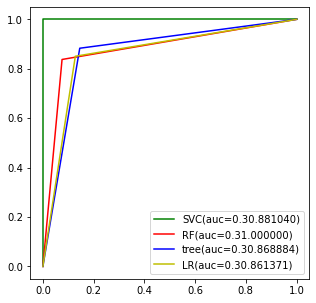

In [119]:
from sklearn.metrics import roc_curve,auc
RF_fpr, RF_tpr, threshold = roc_curve(y_test, RF_prediction)
auc_RF = auc(RF_fpr, RF_tpr)
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, SVC_prediction)
auc_SVC = auc(SVC_fpr, SVC_tpr)

tree_fpr, tree_tpr, threshold = roc_curve(y_test, tree_prediction)
auc_tree = auc(tree_fpr, tree_tpr)

LR_fpr, LR_tpr, threshold = roc_curve(y_test, LR_prediction)
auc_LR = auc(LR_fpr, LR_tpr)


plt.figure(figsize = (5,5))
plt.plot(RF_fpr, RF_tpr,'g', label='SVC(auc=0.3%f)' %auc_SVC)
plt.plot(SVC_fpr, SVC_tpr, 'r', label='RF(auc=0.3%f)' %auc_RF)
plt.plot(tree_fpr, tree_tpr, 'b', label='tree(auc=0.3%f)' %auc_tree)
plt.plot(LR_fpr, LR_tpr, 'y', label='LR(auc=0.3%f)' %auc_LR)
plt.legend()
plt.show()

In [120]:
test_data_prediction = RF_model.predict_proba(test_data)
test_data_prediction


array([[0.89666667, 0.10333333],
       [0.89333333, 0.10666667],
       [0.87      , 0.13      ],
       [0.81666667, 0.18333333],
       [0.90333333, 0.09666667],
       [0.89333333, 0.10666667],
       [0.64      , 0.36      ],
       [0.85333333, 0.14666667],
       [0.85666667, 0.14333333],
       [0.88666667, 0.11333333],
       [0.90333333, 0.09666667],
       [0.81666667, 0.18333333],
       [0.89333333, 0.10666667],
       [0.95666667, 0.04333333],
       [0.93666667, 0.06333333],
       [0.92      , 0.08      ],
       [0.72333333, 0.27666667],
       [0.87333333, 0.12666667],
       [0.81      , 0.19      ],
       [0.98666667, 0.01333333],
       [0.94666667, 0.05333333],
       [0.7       , 0.3       ],
       [0.87666667, 0.12333333],
       [0.88666667, 0.11333333],
       [0.89666667, 0.10333333],
       [0.96      , 0.04      ],
       [0.92333333, 0.07666667],
       [0.90666667, 0.09333333],
       [0.54      , 0.46      ],
       [0.88666667, 0.11333333],
       [0.

In [121]:
Submission = pd.DataFrame(test_data_prediction).set_index(test_data.Id)
Submission

,0,1
Id,,
1,0.896667,0.103333
2,0.893333,0.106667
3,0.870000,0.130000
4,0.816667,0.183333
5,0.903333,0.096667
...,...,...
466,0.703333,0.296667
467,0.420000,0.580000
468,0.823333,0.176667


In [122]:
user_cols = ['xy', 'Attrition']
Submission = pd.DataFrame(test_data_prediction, columns=user_cols).set_index(test_data.Id)
Submission

,xy,Attrition
Id,,
1,0.896667,0.103333
2,0.893333,0.106667
3,0.870000,0.130000
4,0.816667,0.183333
5,0.903333,0.096667
...,...,...
466,0.703333,0.296667
467,0.420000,0.580000
468,0.823333,0.176667


In [123]:
Submission.drop('xy', axis=1, inplace=True)


In [124]:
Submission

,Attrition
Id,
1,0.103333
2,0.106667
3,0.130000
4,0.183333
5,0.096667
...,...
466,0.296667
467,0.580000
468,0.176667


In [125]:
Submission.to_csv('/kaggle/working/Submission2.csv')